*Task*
 
Machine learning modeling for predicting performance of sales agents

*Objectives*

The project aimed at:
1. Training models that would accurately predict the general performance(both credit collections and sales) of a portfolio on agent level using agent attributes.
2. Determining the agent attributes that contribute significantly to bad performance.
3. Determine what improvements are required to improve performance.


In [22]:
!pip install --upgrade --force-reinstall scikit-learn imbalanced-learn

     ---------------------------------------- 0.0/61.2 kB ? eta -:--:--
     ------ --------------------------------- 10.2/61.2 kB ? eta -:--:--
     ------------------------------- ------ 51.2/61.2 kB 650.2 kB/s eta 0:00:01
     -------------------------------------- 61.2/61.2 kB 653.5 kB/s eta 0:00:00
     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     --------------------------------- ------ 51.2/60.4 kB 1.3 MB/s eta 0:00:01
     ---------------------------------------- 60.4/60.4 kB 1.1 MB/s eta 0:00:00
  Using cached joblib-1.3.2-py3-none-any.whl.metadata (5.4 kB)
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.1/10.6 MB 2.3 MB/s eta 0:00:05
   ---------------------------------------- 0.1/10.6 MB 1.8 MB/s eta 0:00:06
    --------------------------------------- 0.2/10.6 MB 1.7 MB/s eta 0:00:07
    --------------------------------------- 0.2/10.6 MB 1.7 MB/s eta 0:00:07
   - -----------------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.0 requires FuzzyTM>=0.4.0, which is not installed.
tables 3.8.0 requires blosc2~=2.0.0, which is not installed.
tables 3.8.0 requires cython>=0.29.21, which is not installed.
numba 0.57.1 requires numpy<1.25,>=1.21, but you have numpy 1.26.3 which is incompatible.


In [1]:
#Importing necessary libraries
import pandas as pd
import sklearn.model_selection as model_selection
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import seaborn as sns

EDA

In [2]:
df=pd.read_excel('C:\\Users\\Public\\Documents\\data\\FSE_model2.xlsx')
df.head()

,Accounts Agent Username,Accounts Country,Angaza Users Eo Age Group,Angaza Users Gender,Angaza Users Education,Angaza Users Main Mode of Travel,Agent Status EO Age,Litmos Users Mandatory Course Complete Percentage,Angaza Users Welcome Call Score,Angaza Users Registering User Welcome Call Score,Portfolio Count Units,Kazi tasks Tasks Completed Percent,Kazi success rate,Fse Prospect Details Perc Installation Pending,Portfolio Follow on Revenue Realization,Accounts Weighted Sales,Portfolio Repayment Speed 2
0,hopekabirigi,Tanzania,25-34,Male,Secondary,Motorcycle,1362,100.0000,100.0,100.0,178,1.0,0.0,0.083333,0.926367,183.50,0.926367
1,mwanahawalipingo,Tanzania,25-34,Female,Primary,Bicycle,1422,100.0000,100.0,100.0,137,0.0,0.0,0.000000,0.782739,152.75,0.990746
2,rashiddeola,Tanzania,18-24,Male,Secondary,Motorcycle,932,89.0909,100.0,NaN,19,0.0,0.0,0.250000,0.932919,18.50,0.932919
3,ibrahimushabani,Tanzania,25-34,Male,Secondary,Bus,1390,100.0000,100.0,20.0,12,1.0,0.0,0.200000,0.254342,12.25,0.858559
4,khatibumussa,Tanzania,45-60,Male,Secondary,Motorcycle,1225,100.0000,100.0,12.0,4,0.0,0.0,0.250000,0.802809,4.50,0.802809


In [8]:
df.shape

(24904, 17)

In [9]:
#Missing values
df.isnull().sum()

Accounts Agent Username                                  0
Accounts Country                                         0
Angaza Users Eo Age Group                              653
Angaza Users Gender                                      0
Angaza Users Education                                1123
Angaza Users Main Mode of Travel                      1180
Agent Status EO Age                                      0
Litmos Users Mandatory Course Complete Percentage     3370
Angaza Users Welcome Call Score                      13151
Angaza Users Registering User Welcome Call Score     13257
Portfolio Count Units                                    0
Kazi tasks Tasks Completed Percent                       0
Kazi success rate                                        0
Fse Prospect Details Perc Installation Pending        3452
Portfolio Follow on Revenue Realization                  0
Accounts Weighted Sales                                  0
Portfolio Repayment Speed 2                             

In [10]:
df=df.dropna()

In [11]:
#Correlation analysis of numerical and ordinal variables
df3 = df[['Accounts Weighted Sales','Portfolio Count Units','Agent Status EO Age', 'Kazi tasks Tasks Completed Percent', 'Litmos Users Mandatory Course Complete Percentage', 'Fse Prospect Details Perc Installation Pending', 'Portfolio Repayment Speed 2', 'Portfolio Follow on Revenue Realization']]
#df3 = df[['Angaza Users Eo Age Group','Agent Status EO Age', 'Kazi tasks Tasks Completed Percent', 'Litmos Users Mandatory Course Complete Percentage', 'Fse Prospect Details Perc Installation Pending', 'Portfolio Repayment Speed 2', 'Portfolio Follow on Revenue Realization']]
df3 = df3.rename(columns={'Agent Status EO Age':'EO age','Accounts Weighted Sales':'Weighted Sales','Portfolio Count Units':'Count units','Portfolio Repayment Speed 2': 'RS','Kazi tasks Tasks Completed Percent': 'Kazi tasks completion', 'Litmos Users Mandatory Course Complete Percentage': 'Mandatory course completion', 'Fse Prospect Details Perc Installation Pending': 'Pending installations rate','Portfolio Follow on Revenue Realization': 'FRR'})
df3['RS'] = pd.to_numeric(df3['RS'], errors='coerce')
df3.corr().round(2)


,Weighted Sales,Count units,EO age,Kazi tasks completion,Mandatory course completion,Pending installations rate,RS,FRR
Weighted Sales,1.00,0.94,0.63,0.18,0.18,0.12,-0.14,0.45
Count units,0.94,1.00,0.67,0.23,0.15,0.15,-0.22,0.46
EO age,0.63,0.67,1.00,0.26,0.17,0.37,-0.25,0.75
Kazi tasks completion,0.18,0.23,0.26,1.00,0.04,0.05,-0.09,0.20
Mandatory course completion,0.18,0.15,0.17,0.04,1.00,-0.01,0.06,0.21
Pending installations rate,0.12,0.15,0.37,0.05,-0.01,1.00,0.03,0.29
RS,-0.14,-0.22,-0.25,-0.09,0.06,0.03,1.00,-0.06
FRR,0.45,0.46,0.75,0.20,0.21,0.29,-0.06,1.00


In [12]:
df3.dtypes

Weighted Sales                 float64
Count units                      int64
EO age                           int64
Kazi tasks completion          float64
Mandatory course completion    float64
Pending installations rate     float64
RS                             float64
FRR                            float64
dtype: object

In [13]:
df3.describe()

,Weighted Sales,Count units,EO age,Kazi tasks completion,Mandatory course completion,Pending installations rate,RS,FRR
count,7697.000000,7697.000000,7697.000000,7697.000000,7697.000000,7697.000000,7697.000000,7697.000000
mean,226.230544,212.935819,750.465116,0.682072,84.045187,0.132535,0.871970,0.524910
std,320.994245,301.019159,603.735714,0.365360,29.975656,0.220108,0.141918,0.215222
min,0.500000,1.000000,60.000000,0.000000,0.000000,0.000000,0.050000,0.037037
25%,34.500000,33.000000,278.000000,0.500000,86.915800,0.000000,0.776253,0.339348
50%,117.500000,97.000000,580.000000,0.846154,100.000000,0.033333,0.868236,0.539253
75%,284.000000,259.000000,988.000000,1.000000,100.000000,0.166667,0.967462,0.688191
max,3960.000000,2956.000000,2756.000000,1.000000,100.000000,1.000000,2.302167,1.008065


In [15]:
#Analysis of variability between performance metrics(prospective target variables; weighted sales, FRR and RS)
import scipy.stats as stats

f_statistic, p_value = stats.f_oneway(df3['FRR'],df3['RS'],df3['Weighted Sales'])

alpha = 0.05  # significance level
if p_value < alpha:
    print("The ANOVA test result is significant, indicating at least one group is different.")
else:
    print("The ANOVA test result is not significant, suggesting no significant differences.")

print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

The ANOVA test result is significant, indicating at least one group is different.
F-statistic: 3799.655550939675
P-value: 0.0


c:\Users\Dell\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Pair plot of numerical attributes')

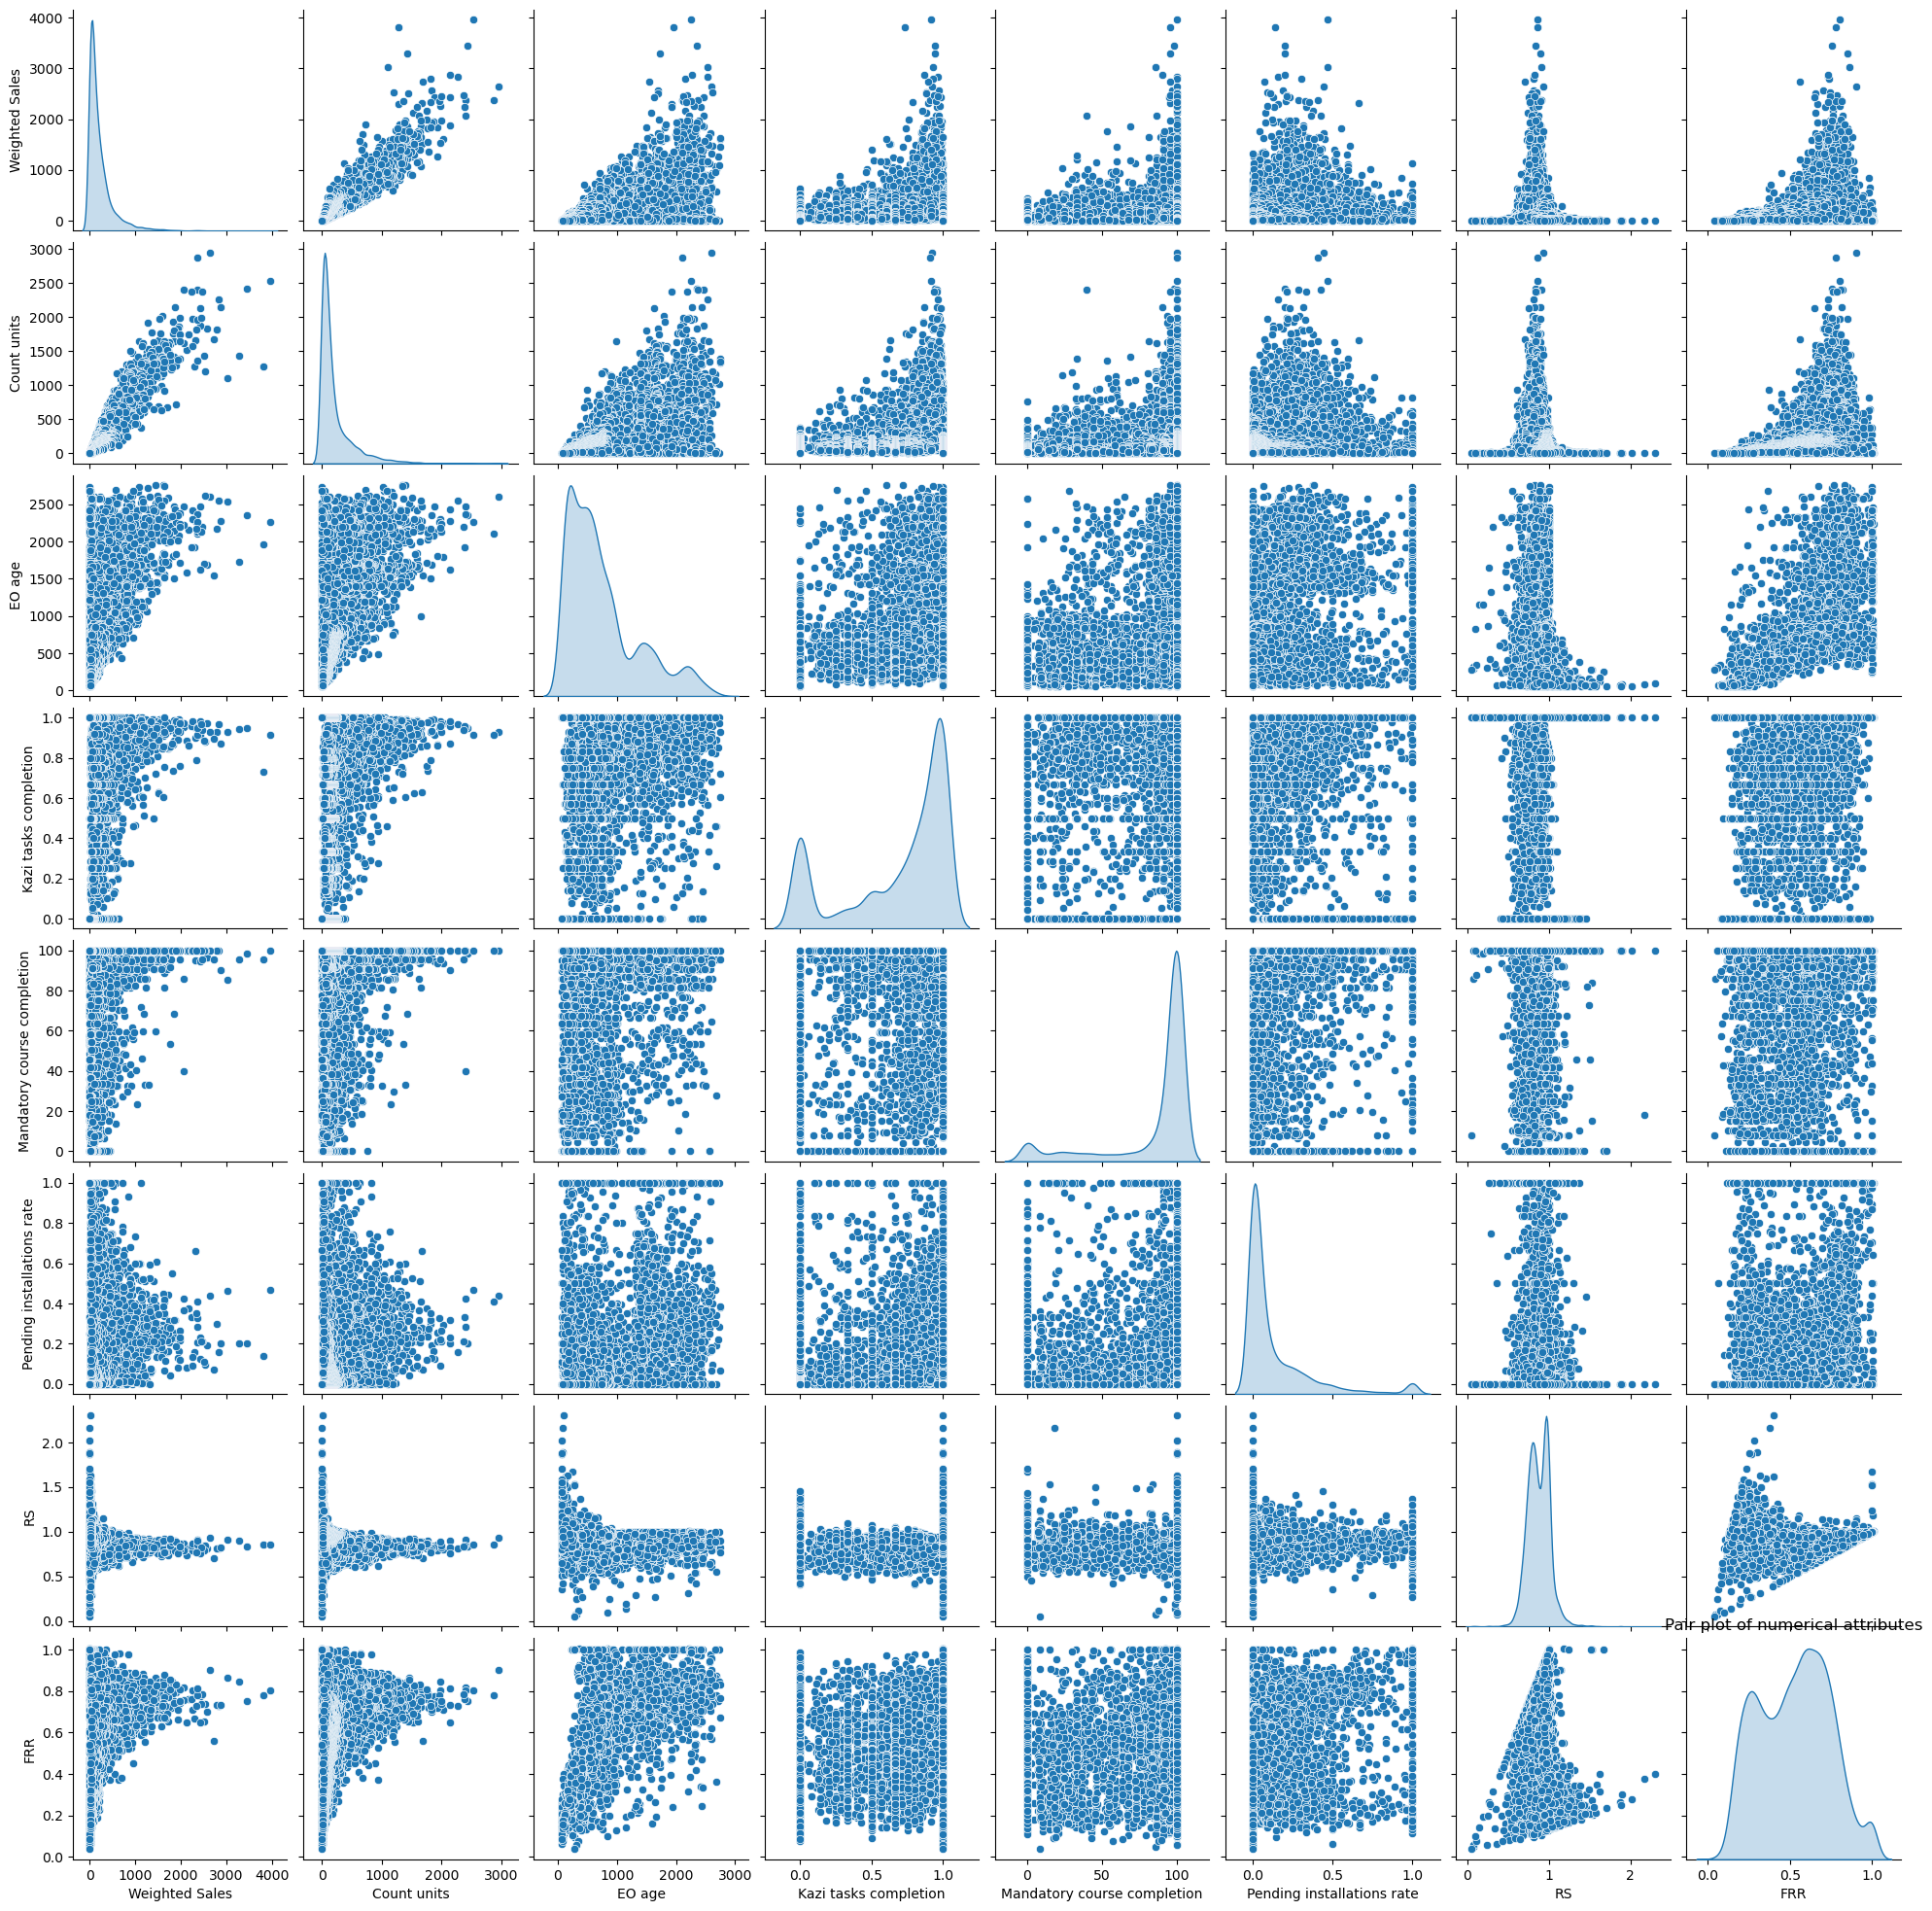

In [16]:
#distribution of numerical features and outliers
sns.pairplot(df3, diag_kind="kde")
plt.title('Pair plot of numerical attributes')

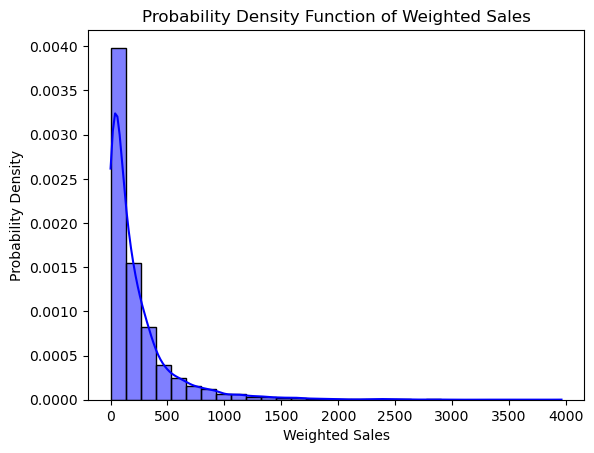

In [17]:
#Probability distribution function of weighted sales
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import pandas as pd

sns.histplot(df3['Weighted Sales'], kde=True, stat='density', color='blue', bins=30)

plt.xlabel('Weighted Sales')
plt.ylabel('Probability Density')
plt.title('Probability Density Function of Weighted Sales')

plt.show()


DATA PREPROCESSING, MODEL TRAINING AND EVALUATION (Target variable Repayment Speed (RS))

In [19]:
def data_preprocessing_model1(df):
  """A function which takes in raw data as an argument and processes/clean it for model training"""

 #dropping all null values from the dataset
 #df=df.drop(['Agent Demographic Details Gender','Agent Demographic Details Age','Agent Demographic Details Date of Birth','Angaza Users Welcome Call Score','Accounts Agent Username'],axis=1)
  #df= df[df['Accounts Country'] == 'Kenya']
  df=df.drop(['Angaza Users Registering User Welcome Call Score','Angaza Users Welcome Call Score','Accounts Agent Username','Accounts Country','Angaza Users Eo Age Group',	'Angaza Users Gender','Angaza Users Education',	'Angaza Users Main Mode of Travel'],axis=1)
  df_model=df.dropna()

  def remove_outliers_zscore(df, threshold):
    """A function which removes outliers"""
    z_scores = np.abs((df['Portfolio Repayment Speed 2'] - df['Portfolio Repayment Speed 2'].mean()) / df['Portfolio Repayment Speed 2'].std())
    #df_no_outliers = df[(z_scores < threshold).all(axis=1)]
    df_no_outliers = df[z_scores < threshold]
    return df_no_outliers
  df_model=remove_outliers_zscore(df_model,3)

  def remove_outliers_zscore1(df, threshold):
    """A function which removes outliers"""
    z_scores = np.abs((df['Accounts Weighted Sales'] - df['Accounts Weighted Sales'].mean()) / df['Accounts Weighted Sales'].std())
    #df_no_outliers = df[(z_scores < threshold).all(axis=1)]
    df_no_outliers = df[z_scores < threshold]
    return df_no_outliers
  #df_model=remove_outliers_zscore1(df_model,3)

  df_model1=df_model.drop(['Accounts Weighted Sales','Kazi success rate','Portfolio Follow on Revenue Realization','Portfolio Count Units'],axis=1)
  #df_model1=df_model.drop(['Portfolio Repayment Speed 2','Angaza Users Registering User Welcome Call Score','Kazi success rate','Portfolio Follow on Revenue Realization','Portfolio Count Units','Accounts Agent Username'],axis=1)
  df_model1=df_model1.dropna()

  df_shuffled = df_model1.sample(frac=1, random_state=101)
  split_ratio = 0.1
  split_index = int(len(df_shuffled) * split_ratio)

  df_test = df_shuffled[:split_index]
  df_model1 = df_shuffled[split_index:]
  df_model1['Agent Status EO Age'] = (df_model1['Agent Status EO Age'] / 31).round(0).astype(int)
  #df_model1['Average Weighted Sales'] = df_model1['Accounts Weighted Sales'] / df_model1['Agent Status EO Age']
  #df_model1=df_model1.drop(['Product Name'],axis=1)

  #Handling class imbalance - Oversampling the minority group
  from imblearn.over_sampling import SMOTE
  from collections import Counter

  X = df_model1.iloc[:,:-1]
  y = df_model1.iloc[:,-1]

  # Normalization of numerical data using Min-Max technique
  from sklearn.preprocessing import MinMaxScaler

  xx=X[['Litmos Users Mandatory Course Complete Percentage']]
  #xx=X[['Litmos Users Mandatory Course Complete Percentage']]
  #xx=X[['Agent Status EO Age','Kazi tasks Tasks Completed Percent','Litmos Users Mandatory Course Complete Percentage',	'Angaza Users Welcome Call Score']]
  scaler = MinMaxScaler()
  scaler.fit(xx)

  x_no_log= pd.DataFrame(scaler.transform(xx), columns=xx.columns)
  x_smote=X.drop(['Litmos Users Mandatory Course Complete Percentage'],axis=1)
  #x_smote=X.drop(['Litmos Users Mandatory Course Complete Percentage'],axis=1)
  #x_smote=X.drop(['Agent Status EO Age','Kazi tasks Tasks Completed Percent','Litmos Users Mandatory Course Complete Percentage',	'Angaza Users Welcome Call Score'],axis=1)
  X=pd.concat([x_smote,x_no_log],axis=1)
  final_df=pd.concat([X,y],axis=1)
  final_df=final_df.dropna()
  #final_df=final_df.drop(['Accounts Country','Accounts Weighted Sales','Angaza Users Education'],axis=1)

  #final_df=final_df.drop(['Angaza Users Gender'],axis=1)
  #return final_df.groupby('Agent Status EO Age').mean().reset_index()
  return final_df

def scalerr(df):
  """A second function which takes in raw data as an argument and processes/clean it for model training"""

#dropping all null values from the dataset
 #df=df.drop(['Agent Demographic Details Gender','Agent Demographic Details Age','Agent Demographic Details Date of Birth','Angaza Users Welcome Call Score','Accounts Agent Username'],axis=1)
  df= df[df['Accounts Country'] == 'Kenya']
  df=df.drop(['Accounts Agent Username','Accounts Country','Angaza Users Eo Age Group',	'Angaza Users Gender','Angaza Users Education',	'Angaza Users Main Mode of Travel'],axis=1)
  df_model=df.dropna()

  def remove_outliers_zscore(df, threshold):
    """A function which removes outliers"""
    z_scores = np.abs((df['Portfolio Repayment Speed 2'] - df['Portfolio Repayment Speed 2'].mean()) / df['Portfolio Repayment Speed 2'].std())
    #df_no_outliers = df[(z_scores < threshold).all(axis=1)]
    df_no_outliers = df[z_scores < threshold]
    return df_no_outliers
  df_model=remove_outliers_zscore(df_model,3)

  def remove_outliers_zscore1(df, threshold):
    """A function which removes outliers"""
    z_scores = np.abs((df['Accounts Weighted Sales'] - df['Accounts Weighted Sales'].mean()) / df['Accounts Weighted Sales'].std())
    #df_no_outliers = df[(z_scores < threshold).all(axis=1)]
    df_no_outliers = df[z_scores < threshold]
    return df_no_outliers
  #df_model=remove_outliers_zscore1(df_model,3)

  df_model1=df_model.drop(['Kazi success rate','Portfolio Follow on Revenue Realization','Portfolio Count Units'],axis=1)
  #df_model1=df_model.drop(['Portfolio Repayment Speed 2','Angaza Users Registering User Welcome Call Score','Kazi success rate','Portfolio Follow on Revenue Realization','Portfolio Count Units','Accounts Agent Username'],axis=1)
  df_model1=df_model1.dropna()

  df_shuffled = df_model1.sample(frac=1, random_state=101)
  split_ratio = 0.1
  split_index = int(len(df_shuffled) * split_ratio)

  df_test = df_shuffled[:split_index]
  df_model1 = df_shuffled[split_index:]
  df_model1['Agent Status EO Age'] = (df_model1['Agent Status EO Age'] / 31).round(0).astype(int)
  #df_model1['Average Weighted Sales'] = df_model1['Accounts Weighted Sales'] / df_model1['Agent Status EO Age']
  #df_model1=df_model1.drop(['Product Name'],axis=1)

  #Handling class imbalance - Oversampling the minority group
  from imblearn.over_sampling import SMOTE
  from collections import Counter

  X = df_model1.iloc[:,:-1]
  y = df_model1.iloc[:,-1]

  # Normalization of numerical data using Min-Max technique
  from sklearn.preprocessing import MinMaxScaler

  xx=X[['Accounts Weighted Sales','Kazi tasks Tasks Completed Percent','Litmos Users Mandatory Course Complete Percentage',	'Angaza Users Welcome Call Score']]
  return xx

def split_data(df):
  """A function that takes in processed and clean data and then splits it to return training and validation sets"""
  X = df.iloc[:,:-1]
  y = df.iloc[:,-1]
  X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.75,test_size=0.25, random_state=101)

  return X_train, X_test, y_train, y_test

def split_data_test(df):
  """A function that takes in processed and clean data and then splits it to return testing set"""
  X = df.iloc[:,:-1]
  y = df.iloc[:,-1]
  X_train1, X_test_final, y_train1, y_test_final = model_selection.train_test_split(X, y, train_size=0.95,test_size=0.05, random_state=101)
  X_train, X_test, y_train, y_test = model_selection.train_test_split(X_train1, y_train1, train_size=0.75,test_size=0.25, random_state=101)

  return X_test_final, y_test_final

def ml_models(m,split_df):
  """A function that takes in split data and model type for training. It retains the performance metrics of the model"""

  X_train, X_test, y_train, y_test=split_df

  #fitting the model
  model = m
  model.fit(X_train, y_train)
  #feature importances
  fts=model.feature_importances_
  print('Feature importance scores: ',fts)
  #predictions
  y_pred_train = model.predict(X_train)
  y_pred_test= model.predict(X_test)

  plt.scatter(X_test['Agent Status EO Age'], y_test, label='Actual values of RS')

  # Linear graph of y_test_pred against X_test['Agent Status EO Age']
  plt.plot(X_test['Agent Status EO Age'], y_pred_test, color='red', label='Model')

  # Labeling and displaying the plot
  plt.xlabel('Agent Status EO Age')
  plt.ylabel('RS')
  #plt.ylabel('Total weighted sales')
  plt.title('Scatter and linear plot of RS')
  plt.legend()
  plt.show()

  y_pred = model.predict(X_test)
  from sklearn.metrics import mean_absolute_error
  from sklearn.metrics import mean_squared_error
  mse_original = mean_squared_error(y_test, y_pred)

  #print(f"Change in performance after removing category '{category_to_remove}' for '{feature_to_remove}': {change_in_performance}")

  mae_train = mean_absolute_error(y_train, y_pred_train)
  mae_test = mean_absolute_error(y_test, y_pred_test)
  mse_train = mean_squared_error(y_train, y_pred_train)
  mse_test = mean_squared_error(y_test, y_pred_test)

  #roc_train = roc_curve(y_train, y_pred_train)
  #roc_test = roc_curve(y_test, y_pred_test)
  print('Training mae:',mae_train.round(2),'\n','Testing mae:',mae_test.round(2))
  print('Training rmse:','\n',mse_train**0.5,'\n','Testing rmse','\n',mse_test**0.5)

def ml_models2(m,split_df):
  """A function that takes in split data and model type for training. It retains the performance metrics of the model"""

  X_train, X_test, y_train, y_test=split_df

  #fitting the model
  model = m
  model.fit(X_train, y_train)
  #feature importances
  #fts=model.feature_importances_
  #print('Attributes         : ','Eo Age Group|','Main Mode of Travel|','EO Age|','Weighted Sales|',	'Kazi tasks completion rate')
  #print('Feature importance scores: ',fts)
  #predictions
  y_pred_train = model.predict(X_train)
  y_pred_test= model.predict(X_test)

  # Function to predict the change in performance
  def predict_performance_change(model,X_test,y_test,change_amount):
      column_names = ['Agent Status EO Age','Accounts Weighted Sales','Kazi tasks Tasks Completed Percent']
      abs_change_amount = [abs(num) for num in change_amount]
      change_amount_df=pd.DataFrame([abs_change_amount], columns=column_names)

      from sklearn.preprocessing import MinMaxScaler
      scaler = MinMaxScaler()
      scaler.fit(scalerr(df))
      x_no_log= pd.DataFrame(scaler.transform(change_amount_df), columns=change_amount_df.columns)
      x_no_log=x_no_log.values.tolist()
      x_no_log=x_no_log[0]
      for n in change_amount:
        if n<0:
          ind=change_amount.index(n)
          x_no_log[ind]=-x_no_log[ind]
      X_test['Agent Status EO Age']=X_test['Agent Status EO Age']+x_no_log[0]
      X_test['Accounts Weighted Sales']=X_test['Accounts Weighted Sales']+x_no_log[1]
      X_test['Kazi tasks Tasks Completed Percent']=X_test['Kazi tasks Tasks Completed Percent']+x_no_log[2]
      #X_cat=X_test.drop(['Agent Status EO Age','Portfolio Sum Weighted Units In Last 30 Days','Accounts Weighted Sales','Kazi tasks Tasks Completed Percent'])

      # Scatter plot of y_test against X_test['Agent Status EO Age']
      plt.scatter(X_test['Agent Status EO Age'], y_test, label='Actual values of performance')

      # Linear graph of y_test_pred against X_test['Agent Status EO Age']
      plt.plot(X_test['Agent Status EO Age'], y_pred_test, color='red', label='Model')

      # Labeling and displaying the plot
      plt.xlabel('Agent Status EO Age')
      plt.ylabel('Performance')
      plt.title('Scatter and linear plot of performance')
      plt.legend()
      plt.show()

      return model.predict(X_test.iloc[0:1,:])-y_test.iloc[0:1,:]
      #return x_no_log

  # Example: Predict performance change if 'Kazi tasks Tasks Completed Percent' increases by 0.3
  #feature_to_change = 'Kazi tasks Tasks Completed Percent'
  i=0
  numericals=['EO Age from first sale','EOs total Weighted Sales','EOs Tasks Completion rate']
  change_amount=[]
  while i<len(numericals):
    inputt=float(input(f"Enter change in: {numericals[i]} "))
    change_amount.append(inputt)
    i+=1

  predicted_increase = predict_performance_change(model,X_test,y_test,change_amount)

  print("Predicted performance change: ",predicted_increase.values)


#ml_models(RandomForestRegressor(max_depth=5,n_estimators=250, random_state=101),split_data(data_preprocessing_model1(df)))
#ml_models(DecisionTreeRegressor(max_depth=1, random_state=0),split_data(data_preprocessing_model1(df)))
#ml_models(KNeighborsClassifier(8),split_data(data_preprocessing_model1(df2)))
#ml_models(SVC(kernel='poly'),split_data(data_preprocessing_model1(df2)))
#ml_models(GaussianNB(),split_data(data_preprocessing_model1(df2)))

In [25]:
pip install --upgrade imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


C:\Users\Dell\AppData\Local\Temp\ipykernel_18528\538149085.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model1['Agent Status EO Age'] = (df_model1['Agent Status EO Age'] / 31).round(0).astype(int)


Feature importance scores:  [0.13003272 0.77819652 0.09042772 0.00134304]


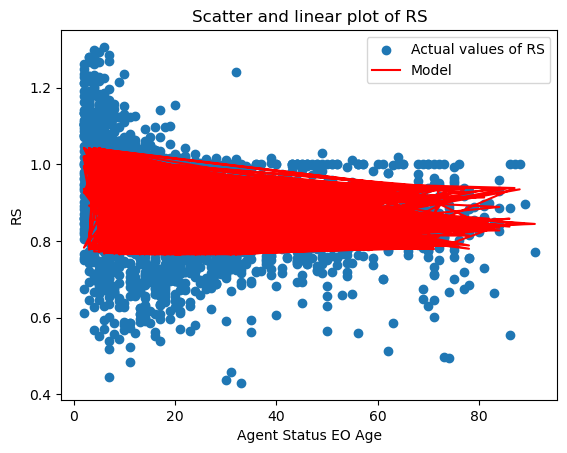

Training mae: 0.08 
 Testing mae: 0.08
Training rmse: 
 0.10670683466596464 
 Testing rmse 
 0.10868536013261437


In [20]:
ml_models(RandomForestRegressor(max_depth=4,n_estimators=150, random_state=101),split_data(data_preprocessing_model1(df)))